## Importing the required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
!pip pad_sequences
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils
import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

SyntaxError: invalid syntax (<ipython-input-3-87671891c059>, line 15)

In [ ]:
from keras import regularizers

In [ ]:
import os

In [ ]:
mylist= os.listdir('/content/drive/MyDrive/data/emodb/wav')

NameError: ignored

In [ ]:
type(mylist)

list

In [ ]:
#print(mylist.shape)

In [ ]:
#print(mylist[400][6:-16])

## Plotting the audio file's waveform and its spectrogram

In [ ]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/data/emodb/wav/03a01Nc.wav')

Populating the interactive namespace from numpy and matplotlib


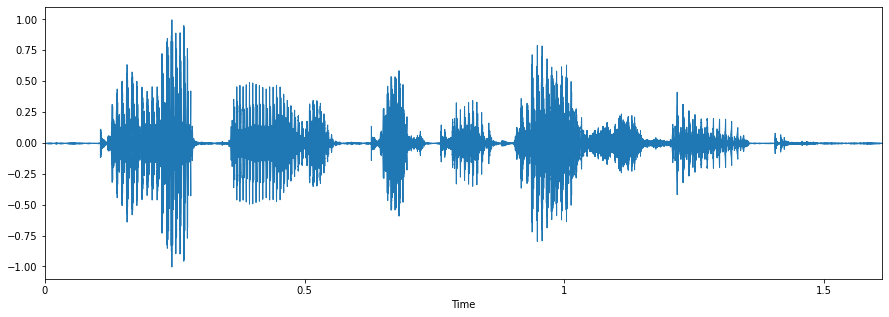

In [ ]:
% pylab inline
import os
import pandas as pd
import librosa
import glob

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

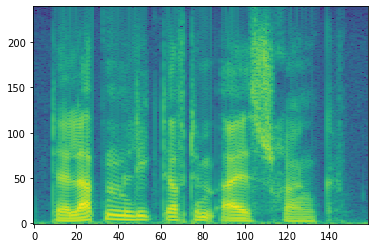

In [ ]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('/content/drive/MyDrive/data/emodb/wav/03a01Nc.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

## Setting the labels

In [ ]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

In [ ]:
labels = pd.DataFrame(feeling_list)

In [ ]:
labels[:10]

""


## Getting the features of audio files using librosa

In [ ]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('/content/drive/MyDrive/data/emodb/wav/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,
                                            sr=sample_rate,
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [ ]:
df[:5]

,feature
0,"[5.1655545, 1.4980439, -8.984783, -8.244851, -..."
1,"[-7.715474, -4.6685863, -4.506566, -12.597951,..."
2,"[6.736272, 3.4209712, -6.514392, -7.11142, -4...."
3,"[-6.6877513, -11.6222315, -33.00862, -31.00546..."
4,"[-15.999096, -15.683348, -17.120592, -17.62100..."


In [ ]:
df3 = pd.DataFrame(df['feature'].values.tolist())

df3[:5]

In [ ]:
newdf = pd.concat([df3,labels], axis=1)

In [ ]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [ ]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,5.165555,1.498044,-8.984783,-8.244851,-7.621767,-8.473580,-9.551672,-12.364936,-14.573252,-13.746461,...,-15.348774,-14.045344,-18.102215,-19.557501,-20.931242,-19.442459,-15.859260,-14.295836,-12.610726,-9.828524
1,-7.715474,-4.668586,-4.506566,-12.597951,-14.470725,-11.222425,-6.082808,-2.747307,-2.672810,-4.170697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.736272,3.420971,-6.514392,-7.111420,-4.999236,-3.169834,-3.483422,-0.786357,-1.057463,-4.907105,...,-6.895143,-6.422885,-6.280108,-6.165024,-6.794539,-6.383778,-5.892204,-6.786578,-5.905037,-2.329336
3,-6.687751,-11.622231,-33.008621,-31.005465,-26.885162,-20.354523,-19.291382,-23.876732,-26.200209,-23.867476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-15.999096,-15.683348,-17.120592,-17.621004,-17.883570,-20.853405,-20.561235,-20.820702,-20.485081,-18.740759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
295,12.717484,9.890956,6.248247,1.097986,-7.529953,-12.974958,-15.681177,-14.633360,-13.564384,-12.345856,...,-0.309748,1.848185,0.484228,-2.202637,-4.476643,-2.933293,-2.256371,-1.231058,0.139907,0.321028
425,-16.796167,-12.935441,-12.794694,-18.171368,-16.297913,-16.092485,-18.719347,-21.277435,-20.055668,-16.127542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,1.849791,1.042299,-2.388429,-2.826522,-2.423001,-2.715855,-2.280817,-1.940734,-2.290709,-2.348060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,-12.006141,-16.082829,-29.484983,-21.341063,-18.360729,-18.317829,-20.174665,-22.091576,-19.890055,-20.660397,...,-29.465361,-27.497084,-26.298336,-24.754143,-27.554850,-32.363297,-33.168861,-33.967258,-36.008972,-34.291885
181,-27.900749,-26.064728,-15.671879,-5.971654,-2.829206,-4.390815,-7.392134,-9.479082,-8.464123,-9.955453,...,-4.900290,-4.813089,-5.321800,-6.694591,-8.749435,-12.054966,-16.300804,-19.814236,-25.095808,-28.717623
491,-7.262676,-10.858901,-28.022890,-27.058968,-25.370369,-21.562878,-21.876530,-22.321848,-21.237186,-20.747845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,5.831380,4.190672,-0.901021,0.387608,1.929276,2.475942,1.702049,0.641944,0.231821,2.177384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,-5.126066,-9.766057,-30.340580,-26.804379,-26.739326,-31.011848,-30.341709,-28.975157,-28.629589,-27.476347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-7.715474,-4.668586,-4.506566,-12.597951,-14.470725,-11.222425,-6.082808,-2.747307,-2.672810,-4.170697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,-26.697224,-29.137980,-34.574852,-18.786057,-13.003403,-15.589565,-24.309303,-26.941128,-26.212038,-23.343327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rnewdf=rnewdf.fillna(0)

## Dividing the data into test and train

In [ ]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [ ]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
119,-0.329353,-1.688777,-4.794347,-6.292057,-4.531809,-3.005169,-4.148150,-7.178019,-11.776793,-15.513912,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-15.999096,-15.683348,-17.120592,-17.621004,-17.883570,-20.853405,-20.561235,-20.820702,-20.485081,-18.740759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
459,-10.420817,-12.406782,-16.738445,-17.696548,-17.453114,-20.149260,-22.600159,-24.192747,-23.973675,-25.120789,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
322,-30.320683,-31.572348,-30.498343,-28.148844,-27.459316,-25.443998,-21.067854,-13.067036,-12.702663,-17.345726,...,-21.542362,-16.649405,-12.605907,-11.809363,-12.784403,-16.566256,-27.181248,-23.593086,-20.934465,-19.984018
13,-31.539520,-28.378702,-18.825808,-9.312852,-4.732949,-4.380565,-6.224231,-7.761573,-7.690078,-7.050646,...,-8.763824,-8.470428,-8.107307,-9.671958,-8.962879,-9.305144,-10.296141,-11.688267,-7.007019,-0.782907
130,2.928976,-1.036037,-16.659946,-15.914311,-17.370277,-19.984842,-20.510128,-18.814014,-17.775360,-20.406404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
277,-28.792889,-21.248379,-8.100020,-1.231489,-1.490347,-5.541097,-7.587367,-7.669230,-7.300838,-6.183657,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15,-24.310646,-20.370785,-18.821459,-18.718704,-19.050413,-19.157763,-21.126534,-21.695438,-18.748470,-19.288433,...,-9.506575,-10.436262,-11.589842,-12.099603,-12.350900,-12.595549,-13.946221,-12.111350,-10.661894,-9.620286
517,-15.984907,-9.839024,-7.224992,-8.918464,-12.696756,-12.322961,-11.288428,-10.419668,-11.371622,-9.833570,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
273,-21.209217,-20.624969,-14.667568,-8.947828,-7.600329,-7.184621,-9.161396,-9.863327,-9.825889,-10.705383,...,-10.246421,-9.929805,-14.104232,-23.655020,-27.884838,-29.000538,-30.646746,-31.391666,-30.259796,-31.861870


In [ ]:
trainfeatures = train.iloc[:, :-1]

In [ ]:
trainlabel = train.iloc[:, -1:]

In [ ]:
testfeatures = test.iloc[:, :-1]

In [ ]:
testlabel = test.iloc[:, -1:]

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(416, 215)

## Changing dimension for CNN model

In [ ]:

x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [ ]:
import tensorflow

In [ ]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(215,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))


model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = tensorflow.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 215, 256)          1536      
                                                                 
 activation_45 (Activation)  (None, 215, 256)          0         
                                                                 
 conv1d_37 (Conv1D)          (None, 215, 128)          163968    
                                                                 
 activation_46 (Activation)  (None, 215, 128)          0         
                                                                 
 dropout_9 (Dropout)         (None, 215, 128)          0         
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 26, 128)          0         
 1D)                                                             
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

### Removed the whole training part for avoiding unnecessary long epochs list

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=70, validation_data=(x_testcnn, y_test))

Epoch 1/70


ValueError: ignored

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [ ]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Loading the model

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

## Predicting emotions on the test data

In [ ]:
preds = loaded_model.predict(x_testcnn,
                         batch_size=32,
                         verbose=1)

In [ ]:
preds

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
predictions = (lb.inverse_transform((abc)))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

In [ ]:
finaldf = actualdf.join(preddf)

## Actual v/s Predicted emotions

In [ ]:
finaldf[170:180]

In [ ]:
finaldf.groupby('actualvalues').count()

In [ ]:
finaldf.groupby('predictedvalues').count()

In [ ]:
finaldf.to_csv('Predictions.csv', index=False)

## Live Demo

In [ ]:
data, sampling_rate = librosa.load('output10.wav')

NameError: ignored

In [ ]:
% pylab inline
import os
import pandas as pd
import librosa
import glob

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

Populating the interactive namespace from numpy and matplotlib


AttributeError: ignored

<Figure size 1080x360 with 0 Axes>

In [ ]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [ ]:
livedf2= pd.DataFrame(data=livedf2)

In [ ]:
livedf2 = livedf2.stack().to_frame().T

In [ ]:
livedf2

In [ ]:
twodim= np.expand_dims(livedf2, axis=2)

In [ ]:
livepreds = loaded_model.predict(twodim,
                         batch_size=32,
                         verbose=1)

In [ ]:
livepreds

In [ ]:
livepreds1=livepreds.argmax(axis=1)

In [ ]:
liveabc = livepreds1.astype(int).flatten()

In [ ]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions